<a href="https://colab.research.google.com/github/AshrafalKhalique/Code-for-Generating-Confusion-Matrix-ROC/blob/main/Code_for_Generating_Confusion_Matrix_and_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Confusion matrix**

A *confusion matrix* is a table that visualizes a classification model's performance by comparing its predicted outcomes against the actual values, showing counts of true positives, true negatives, false positives, and false negatives.

* **True Positive (TP):** The model correctly predicted a positive outcome i.e the actual outcome was positive.
* **True Negative (TN):** The model correctly predicted a negative outcome i.e the actual outcome was negative.
* **False Positive (FP):** The model incorrectly predicted a positive outcome i.e the actual outcome was negative. It is also known as a Type I error.
* **False Negative (FN):** The model incorrectly predicted a negative outcome i.e the actual outcome was positive. It is also known as a Type II error.

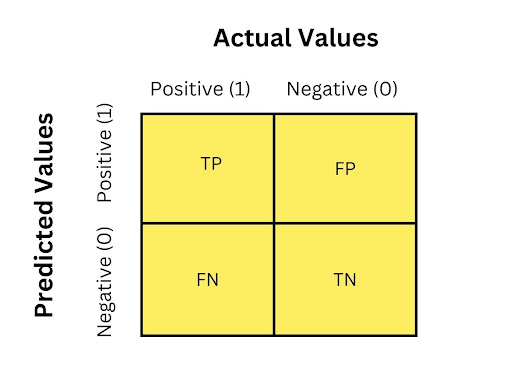


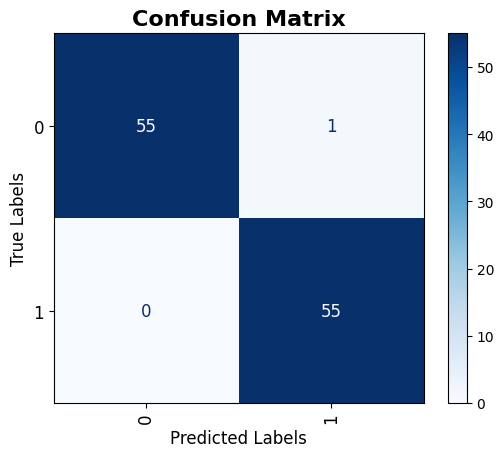

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the confusion matrix
cm = np.array([[55, 1],
               [0, 55]])

# Define class labels; Let's say we have 2 class
target_names = ['0', '1'] # You can change this and write your class label i.e., Male-Female/Diabetic-Non Diabetic etc.

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')  # Customize the plot

# Increase font size and font weight for the matrix numbers
for text in disp.text_.ravel():
    text.set_fontsize(12)  # Set font size

# Increase font size and font weight for titles, labels, and ticks
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')  # Title with bold font
plt.xlabel("Predicted Labels", fontsize=12)  # X-axis label
plt.ylabel("True Labels", fontsize=12)  # Y-axis label
plt.xticks(fontsize=12)  # X-axis tick labels
plt.yticks(fontsize=12)  # Y-axis tick labels

# Save the figure
plt.savefig("ConfsuionMatrix.png", dpi=300, bbox_inches="tight")  # Save with high resolution
plt.show()  # Show the plot


# **AUC-ROC curve**

*AUC-ROC curve* is a graph used to check how well a binary classification model works. It helps us to understand how well the model separates the positive cases like people with a disease from the negative cases like people without the disease at different threshold level. It shows how good the model is at telling the difference between the two classes by plotting:

* **True Positive Rate (TPR):** how often the model correctly predicts the positive cases also known as Sensitivity or Recall.
* **False Positive Rate (FPR):** how often the model incorrectly predicts a negative case as positive.
* **Specificity:** measures the proportion of actual negatives that the model correctly identifies. It is calculated as 1 - FPR.

The higher the curve the better the model is at making correct predictions.

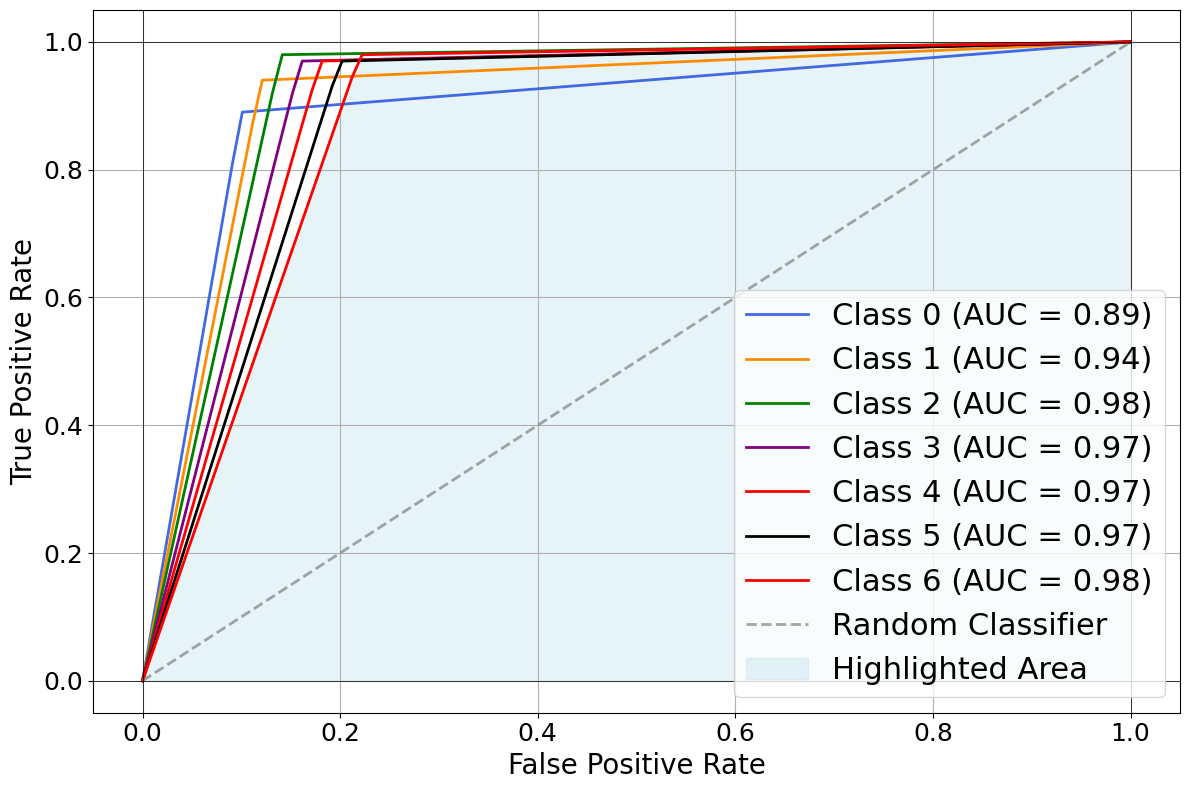

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names and AUC values; You can change this and write your class label i.e., Male-Female/Diabetic-Non Diabetic etc.
classes = {
    "Class 0": 0.89,
    "Class 1": 0.94,
    "Class 2": 0.98,
    "Class 3": 0.97,
    "Class 4": 0.97,
    "Class 5": 0.97,
    "Class 6": 0.98,
}

# Simulate the ROC data for the sake of example
fpr_dict = {}
tpr_dict = {}

for i, (class_name, auc_value) in enumerate(classes.items()):
    # Define the operating point at the specified AUC value
    operating_fpr = 0.1 + 0.02 * i  # Example false positive rate for the operating point, staggered
    operating_tpr = auc_value  # Use the AUC value as the true positive rate for the operating point

    # Create a smoother curve from the operating point to the top-right corner using interpolation
    fpr = np.array([0, operating_fpr, 1])
    tpr = np.array([0, operating_tpr, 1])

    # Interpolate points to create a rounder curve
    fpr_smooth = np.linspace(0, 1, 100)
    tpr_smooth = np.interp(fpr_smooth, fpr, tpr)

    fpr_dict[class_name] = fpr_smooth
    tpr_dict[class_name] = tpr_smooth

# Plot ROC curves
plt.figure(figsize=(12, 8))

# Colors for different classes
colors = ['royalblue', 'darkorange', 'green', 'purple', 'red', 'black','red']
for (class_name, color) in zip(classes.keys(), colors):
    plt.plot(fpr_dict[class_name], tpr_dict[class_name], color=color, lw=2,
             label=f'{class_name} (AUC = {classes[class_name]:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', alpha=0.7, label='Random Classifier')

# Highlighted area example (for one class as a sample)
class_to_highlight = "Class 6"
plt.fill_between(fpr_dict[class_to_highlight], tpr_dict[class_to_highlight], color='lightblue', alpha=0.3, label='Highlighted Area')

# Plot settings
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
#plt.title('Area Under Curve (AUC) Curves for Different Methods', fontsize=20, fontweight='bold')
plt.legend(loc='lower right', fontsize=22)
plt.grid(True)
plt.xticks(fontsize=18)  # X-axis tick labels
plt.yticks(fontsize=18)  # Y-axis tick labels
# Add confusion matrix grid
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.axhline(y=1, color='black', linestyle='-', linewidth=0.5)
plt.axvline(x=1, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('DT_AUC.png', dpi=300)

# Show the plot
plt.show()
